In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
from keras.models import Sequential

In [4]:
mean=train_data.mean(axis=0)
train_data=train_data-mean

In [5]:
std=train_data.std(axis=0)
train_data=train_data/std

In [6]:
test_data=test_data-mean
test_data=test_data/std

In [7]:
from keras import layers

In [17]:
model=Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))

In [18]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [19]:
history=model.fit(train_data,train_labels,epochs=100,validation_split=0.25,batch_size=1,verbose=1)

Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 542.6202 - mae: 21.2658 - val_loss: 441.8105 - val_mae: 18.2463
Epoch 2/100
303/303 [==============================] - 0s 901us/step - loss: 234.7260 - mae: 12.6997 - val_loss: 172.1201 - val_mae: 8.6174
Epoch 3/100
303/303 [==============================] - 0s 908us/step - loss: 76.6204 - mae: 6.0151 - val_loss: 121.4210 - val_mae: 7.1967
Epoch 4/100
303/303 [==============================] - 0s 971us/step - loss: 51.7346 - mae: 4.8584 - val_loss: 93.4386 - val_mae: 6.0320
Epoch 5/100
303/303 [==============================] - 0s 960us/step - loss: 35.8738 - mae: 3.8945 - val_loss: 78.2493 - val_mae: 5.4373
Epoch 6/100
303/303 [==============================] - 0s 998us/step - loss: 27.0700 - mae: 3.5477 - val_loss: 65.0258 - val_mae: 4.9796
Epoch 7/100
303/303 [==============================] - 0s 982us/step - loss: 23.9862 - mae: 3.3267 - val_loss: 60.0912 - val_mae: 4.7722
Epoch 8/100
303/303 [==============

In [20]:
model.evaluate(test_data,test_labels,verbose=1)

4/4 [==============================] - 0s 3ms/step - loss: 17.1155 - mae: 2.5912


[17.11547088623047, 2.5911829471588135]

In [22]:
history_dict=history.history

In [23]:
from matplotlib import pyplot as plt

In [24]:
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

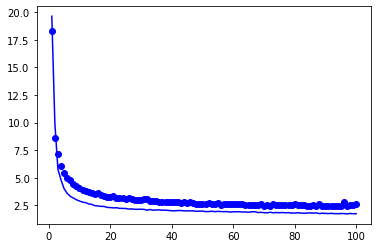

In [28]:
plt.plot(range(1,len(history_dict['mae'])+1),history_dict['mae'],'b',label='mae')
plt.plot(range(1,len(history_dict['mae'])+1),history_dict['val_mae'],'bo',label=' val_mae')
plt.show()

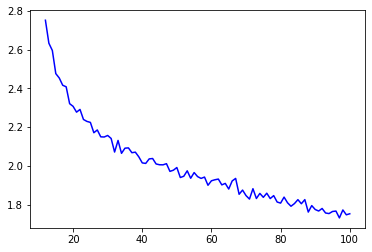

In [37]:
#dropping the first 10
plt.plot(range(12,len(history_dict['mae'])+1),history_dict['mae'][11:],'b',label='mae')
plt.show()


In [38]:
def smooth_func(points,factor=0.9):
  full_set=[]
  for point in points:
    if(full_set):
      full_set.append(full_set[-1]*factor+(1-factor)*point)
    else:
      full_set.append(point)
  return full_set

In [39]:
smooth_set=smooth_func(history_dict['mae'])

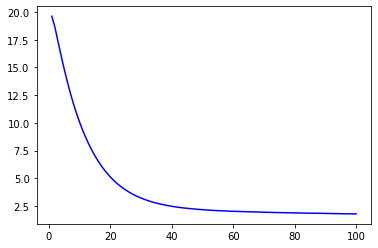

In [40]:
plt.plot(range(1,len(history_dict['mae'])+1),smooth_set,'b',label='mae')
plt.show()


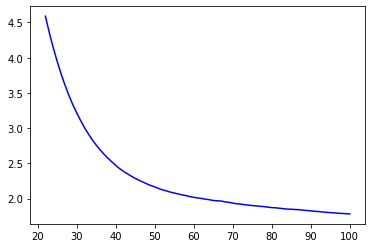

In [42]:
plt.plot(range(22,len(history_dict['mae'])+1),smooth_set[21:],'b',label='mae')
plt.show()

In [44]:
test_data[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [45]:
test_labels[0]

7.2

In [58]:
predictions_set=model.predict(test_data)

In [52]:
import numpy as np

In [55]:
model.predict(np.reshape(test_data[0],(-1,13)))

array([[9.32135]], dtype=float32)

In [56]:
test_data.shape

(102, 13)

In [57]:
test_data[0].shape

(13,)

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions_set,test_labels)

17.115474041291527

In [60]:
len(predictions_set)

102